<a href="https://colab.research.google.com/github/Asigen93/-Tirta_Romadhon_Cipta_Saputra-TugasMachineLearning/blob/main/Random_Forest_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as prep

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/(Tirta Romadhon Cipta Saputra)TM9/dataset

/content/drive/MyDrive/(Tirta Romadhon Cipta Saputra)TM9/dataset


# FUNCTION

In [4]:
def encoder(df, columns):
    for x in columns :
        labelEncoder = prep.LabelEncoder()
        labelEncoder.fit(df[x])
        df[(x + "_code")] = labelEncoder.transform(df[x])
        df = df.drop([x],axis='columns')
    return df

# DATA

In [5]:
df1 = pd.read_csv('american_income_1994.csv')
df1.shape

(48842, 15)

In [6]:
df1.describe()

,age,fnlwft,education_num,capital_gain,capital_loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwft          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# PRE-PROCESSING DATA


## DATA CLEANING

### Duplicated Data Handling

In [8]:
df1.duplicated().sum()

29

In [9]:
df2 = df1.drop_duplicates(keep='first')

### Missing Value Handling


In [10]:
df2.isnull().sum()

age               0
workclass         0
fnlwft            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

### Encoding

In [11]:
df3 = df2.copy()

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwft          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education_num   48813 non-null  int64 
 5   marital_status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital_gain    48813 non-null  int64 
 11  capital_loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native_country  48813 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Dapat dilihat terdapat beberapa kolom yang nilainya bukan numerik.

1. Workclass
2. education
3. martial_status
4. occupation
5. relationship
6. race
7. sex
8. native_country
9. income

Semuanya akan diubah menjadi numerik dengan LabelEncoder,
ini tidak masalah karena masalah klasifikasi sehingga nilai numeriknya tidak memiliki arti

In [13]:
df4 = encoder(df3,['workclass','education','marital_status','occupation','relationship','race','sex','native_country'])
df4

,age,fnlwft,education_num,capital_gain,capital_loss,hours-per-week,income,workclass_code,education_code,marital_status_code,occupation_code,relationship_code,race_code,sex_code,native_country_code
0,39,77516,13,2174,0,40,<=50K,7,9,4,1,1,4,1,39
1,50,83311,13,0,0,13,<=50K,6,9,2,4,0,4,1,39
2,38,215646,9,0,0,40,<=50K,4,11,0,6,1,4,1,39
3,53,234721,7,0,0,40,<=50K,4,1,2,6,0,2,1,39
4,28,338409,13,0,0,40,<=50K,4,9,2,10,5,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,<=50K.,4,9,0,10,1,4,0,39
48838,64,321403,9,0,0,40,<=50K.,0,11,6,0,2,2,1,39
48839,38,374983,13,0,0,50,<=50K.,4,9,2,10,0,4,1,39
48840,44,83891,13,5455,0,40,<=50K.,4,9,0,1,3,1,1,39


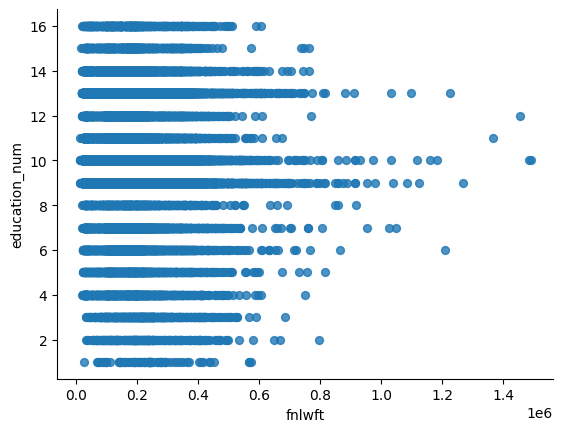

In [24]:
# @title fnlwft vs education_num

from matplotlib import pyplot as plt
df4.plot(kind='scatter', x='fnlwft', y='education_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df = df4.copy()

# EDA

Kita Lewati dulu karena fokusnya adalah belajar algoritma

## MODELING

In [15]:
df['income'] = df['income'].apply(lambda x: ''.join(x).replace(' ', '').replace('.', ''))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  48813 non-null  int64 
 1   fnlwft               48813 non-null  int64 
 2   education_num        48813 non-null  int64 
 3   capital_gain         48813 non-null  int64 
 4   capital_loss         48813 non-null  int64 
 5   hours-per-week       48813 non-null  int64 
 6   income               48813 non-null  object
 7   workclass_code       48813 non-null  int64 
 8   education_code       48813 non-null  int64 
 9   marital_status_code  48813 non-null  int64 
 10  occupation_code      48813 non-null  int64 
 11  relationship_code    48813 non-null  int64 
 12  race_code            48813 non-null  int64 
 13  sex_code             48813 non-null  int64 
 14  native_country_code  48813 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 6.0+ MB


In [17]:
X = df.drop(['income', 'fnlwft'], axis='columns')
y = df['income']

In [18]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48813, dtype: object

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=90)

In [20]:
model = ensemble.RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [22]:
accuracy = metrics.accuracy_score(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)

print(accuracy)
print(report)
print(model.feature_importances_)

0.8516849329099662
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      7424
        >50K       0.71      0.64      0.67      2339

    accuracy                           0.85      9763
   macro avg       0.80      0.78      0.79      9763
weighted avg       0.85      0.85      0.85      9763

[0.21642036 0.10190009 0.12066873 0.0423161  0.11042455 0.04897364
 0.03228967 0.06739365 0.08476504 0.12160031 0.01693308 0.01432442
 0.02199035]


Hasil tersebut merupakan hasil latihan, untuk analysis lebih lanjut akan ada pada repository ml_project